In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df1=df.sample(n=600000, random_state=0)

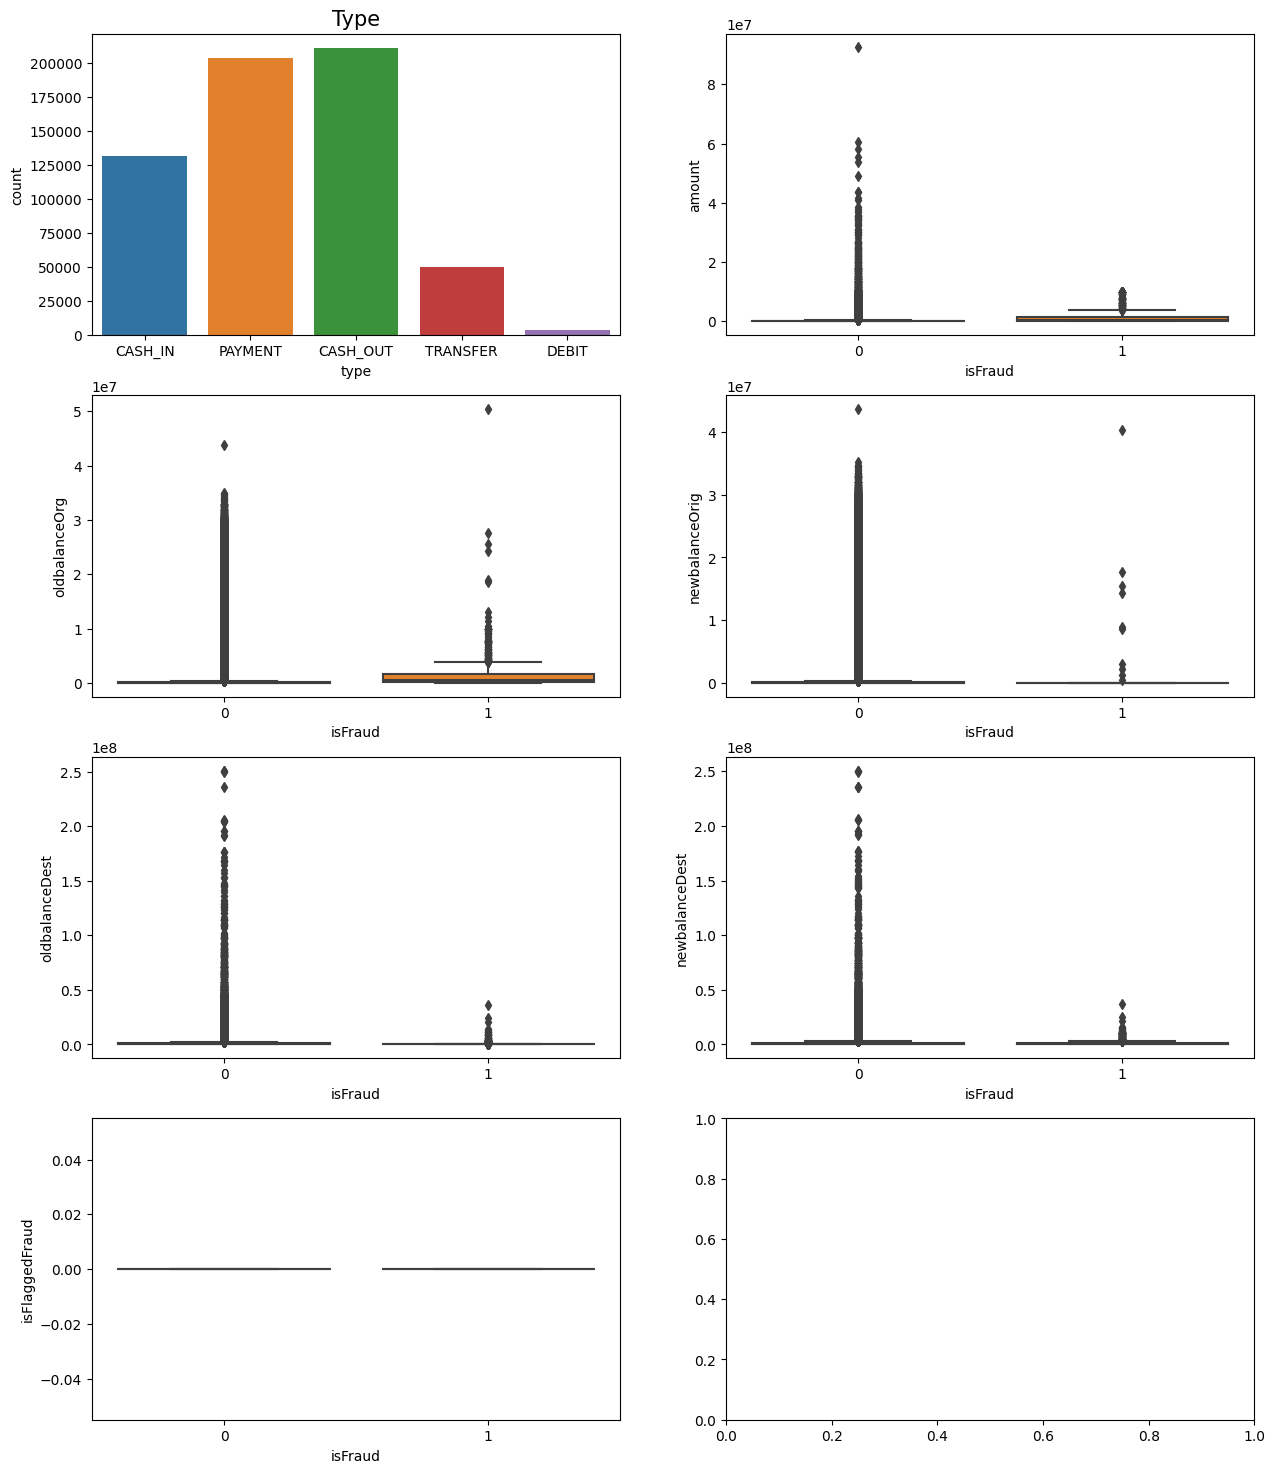

In [8]:
fig, ax = plt.subplots(4,2,figsize=(15,18))
sns.countplot(x=df1.type,ax=ax[0][0]).set_title('Type',size=15)
sns.boxplot(x=df1.isFraud,y=df['amount'],ax=ax[0][1])
sns.boxplot(x=df1.isFraud,y=df['oldbalanceOrg'],ax=ax[1][0])
sns.boxplot(x=df1.isFraud,y=df['newbalanceOrig'],ax=ax[1][1])
sns.boxplot(x=df1.isFraud,y=df['oldbalanceDest'],ax=ax[2][0])
sns.boxplot(x=df1.isFraud,y=df['newbalanceDest'],ax=ax[2][1])
sns.boxplot(x=df1.isFraud,y=df['isFlaggedFraud'],ax=ax[3][0])

plt.show()

In [10]:
from pycaret.classification import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
df2=df1.drop(['step','nameOrig','nameDest','isFlaggedFraud'],axis=1)


In [12]:
df_train, df_test = train_test_split(df2, random_state =100 , test_size = 0.3)

In [13]:
setup_df = setup(data= df_train, target = 'isFraud', session_id=100, data_split_stratify=True,remove_outliers=True)

,Description,Value
0,Session id,100
1,Target,isFraud
2,Target type,Binary
3,Original data shape,"(420000, 7)"
4,Transformed data shape,"(405300, 11)"
5,Transformed train set shape,"(279300, 11)"
6,Transformed test set shape,"(126000, 11)"
7,Numeric features,5
8,Categorical features,1
9,Preprocess,True


In [14]:
models = compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,0.9974,0.9922,0.9899,0.9910,0.9910,0.9910,3.7690
rf,Random Forest Classifier,0.9995,0.9652,0.6616,0.9662,0.7833,0.7831,0.7982,12.5250
ada,Ada Boost Classifier,0.9993,0.9907,0.5259,0.8903,0.6542,0.6538,0.6801,8.2750
knn,K Neighbors Classifier,0.9992,0.7989,0.4632,0.8205,0.5862,0.5858,0.6126,3.0710
et,Extra Trees Classifier,0.9992,0.9562,0.4401,0.9267,0.5907,0.5903,0.6345,5.6130
dt,Decision Tree Classifier,0.9991,0.7865,0.5732,0.7081,0.6305,0.6301,0.6351,2.2580
gbc,Gradient Boosting Classifier,0.9991,0.8777,0.6202,0.6838,0.6345,0.6340,0.6426,34.5850
ridge,Ridge Classifier,0.9987,0.0000,0.0207,0.5000,0.0396,0.0396,0.1004,1.6910
dummy,Dummy Classifier,0.9987,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.5620
svm,SVM - Linear Kernel,0.9960,0.0000,0.5727,0.2668,0.3234,0.3221,0.3646,2.1700


[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=100, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=-1, oob_score=False,
                        random_state=100, verbose=0, warm_start=False),
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                    estimator=None, learning_rate=1.0, n_estimators=50,
                    ra

In [15]:
xgb = create_model("lr")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,0.9737,1.0000,0.9867,0.9866,0.9867
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,0.9744,0.9870,0.9870,0.9871
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,0.9744,0.9870,0.9870,0.9871
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9999,0.9870,0.9744,0.9500,0.9620,0.9620,0.9621
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


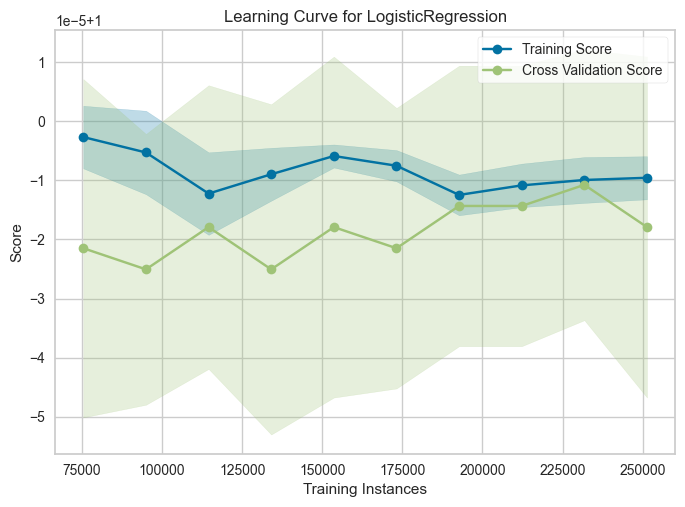

In [16]:
plot_model(estimator = xgb , plot= "learning")

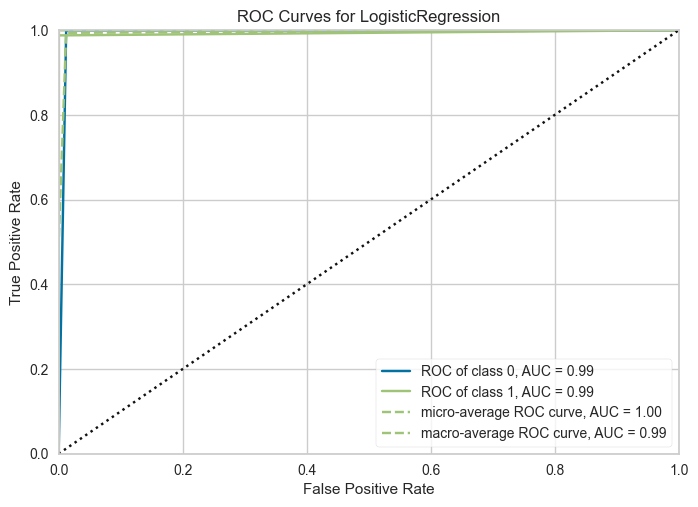

In [17]:
plot_model(estimator = xgb , plot= "auc")

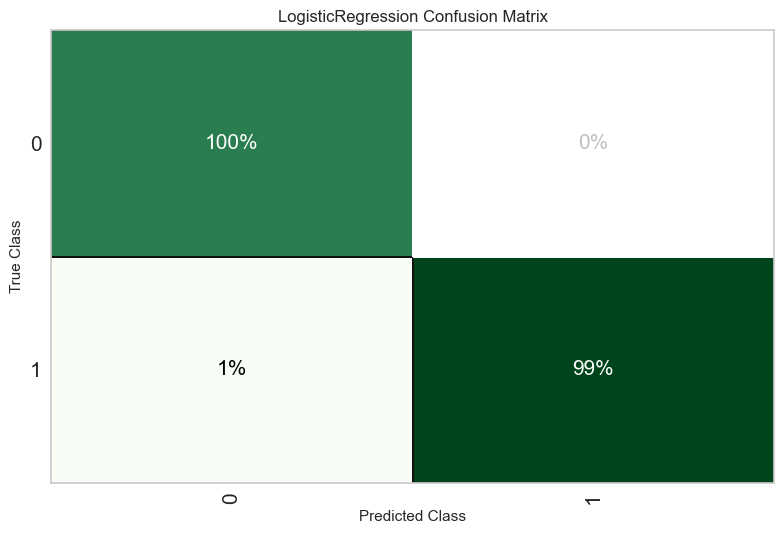

In [18]:
plot_model(estimator = xgb , plot= "confusion_matrix", plot_kwargs = {'percent' : True})

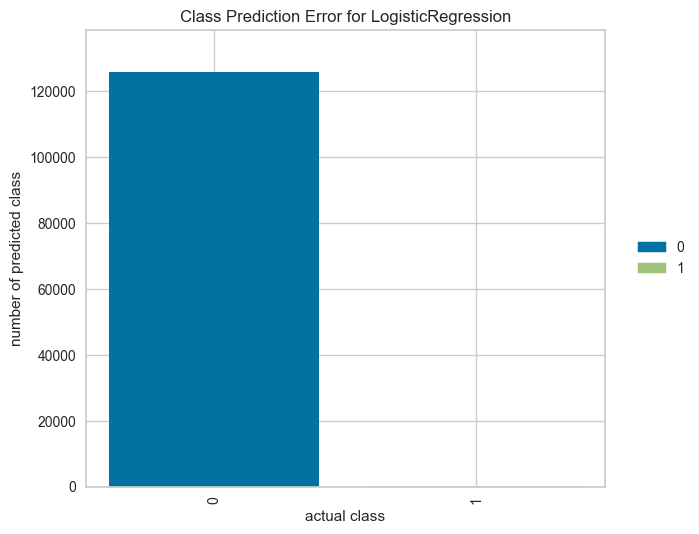

In [19]:
plot_model(estimator = xgb, plot = "error")

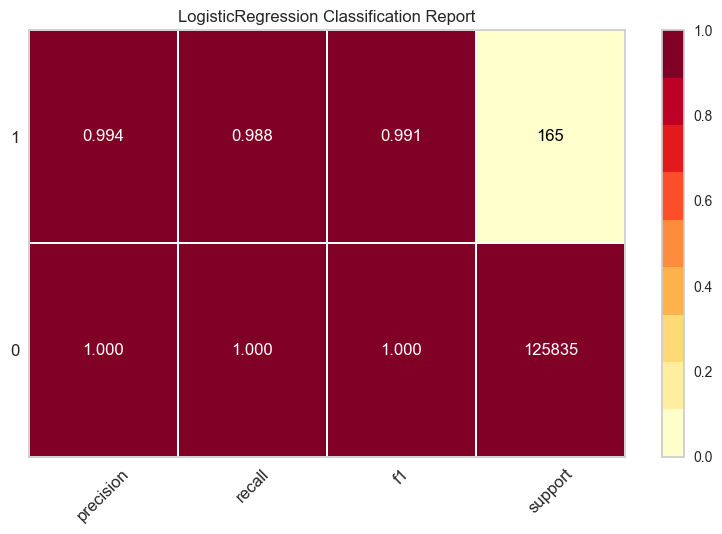

In [20]:
plot_model(estimator = xgb, plot = "class_report")

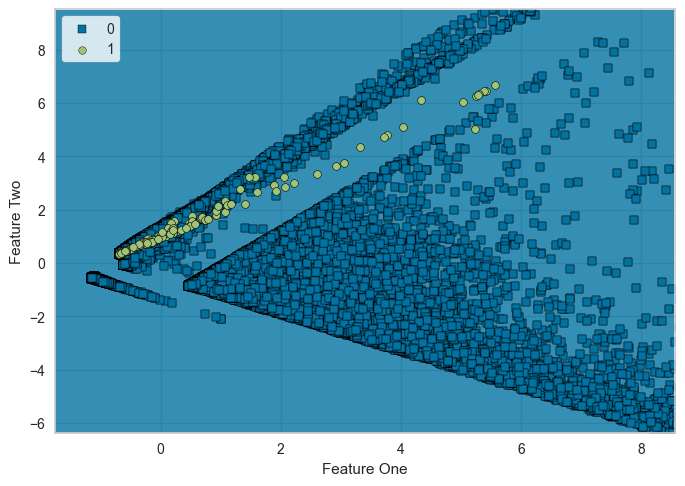

In [21]:
plot_model(estimator = xgb, plot = "boundary")

In [22]:
# interpret_model(xgb)

In [23]:
predict_model(xgb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,0.9939,0.9879,0.9939,0.9909,0.9909,0.9909


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,prediction_label,prediction_score
2949688,PAYMENT,9449.559570,10025.0,575.440002,0.000000e+00,0.000000e+00,0,0,1.0
6298409,PAYMENT,7170.229980,0.0,0.000000,0.000000e+00,0.000000e+00,0,0,1.0
2785107,CASH_OUT,360484.687500,0.0,0.000000,1.102941e+06,1.463426e+06,0,0,1.0
5133937,CASH_OUT,30446.650391,0.0,0.000000,7.729832e+05,8.034299e+05,0,0,1.0
296506,CASH_OUT,132696.953125,10901.0,0.000000,1.021638e+06,1.154335e+06,0,0,1.0
...,...,...,...,...,...,...,...,...,...
1688,PAYMENT,8329.299805,20583.0,12253.700195,0.000000e+00,0.000000e+00,0,0,1.0
4830428,PAYMENT,17569.800781,54595.0,37025.199219,0.000000e+00,0.000000e+00,0,0,1.0
5066747,PAYMENT,25577.710938,0.0,0.000000,0.000000e+00,0.000000e+00,0,0,1.0
2768707,CASH_OUT,221451.609375,0.0,0.000000,3.356071e+05,5.570587e+05,0,0,1.0


In [28]:
predict_model(xgb, data=['CASH_OUT',65799.25,0.00,0.00,923546,982365])

AttributeError: 'list' object has no attribute 'columns'

In [26]:
pred = predict_model(xgb, data=df_test)
pred

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9999,0.9844,0.9692,0.9865,0.9778,0.9777,0.9778


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,prediction_label,prediction_score
3244034,CASH_OUT,65799.250000,0.000000e+00,0.0,9.211249e+05,9.869241e+05,0,0,1.0
5220474,PAYMENT,24701.300781,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0,0,1.0
1401746,CASH_IN,218290.187500,3.876480e+06,4094770.0,2.693502e+07,2.671673e+07,0,0,1.0
3074987,PAYMENT,293.190002,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0,0,1.0
2105091,CASH_IN,232593.625000,1.827970e+06,2060563.5,1.325693e+06,1.093100e+06,0,0,1.0
...,...,...,...,...,...,...,...,...,...
738899,PAYMENT,14222.719727,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0,0,1.0
4484037,CASH_OUT,334047.812500,8.068045e+04,0.0,1.455126e+07,1.516448e+07,0,0,1.0
4607425,PAYMENT,10065.690430,4.890000e+02,0.0,0.000000e+00,0.000000e+00,0,0,1.0
3115858,CASH_OUT,183912.875000,2.144500e+04,0.0,1.810907e+06,1.994820e+06,0,0,1.0


In [25]:
accuracy_score(pred['isFraud'],pred['prediction_label'])

0.9999444444444444